# BoW algorithm with perceptron

Implement the BoW algorithm described in the lecture by using the three class sentiment classification dataset

In [2]:
import os

## Read the dataset

In [1]:
data_root = "/Users/sohammistri/Documents/CMU-CS-11-711-anlp/data/sst-sentiment-text-threeclass"

In [3]:
data = {}

for mode in ["train", "dev", "test"]:
    file_path = os.path.join(data_root, mode + ".txt")
    x, y = [], []

    with open(file_path) as f:
        for line in f.readlines():
            label, text = line.split(" ||| ")
            label = int(label.strip())
            text = text.strip()
            x.append(text)
            y.append(label)

    assert len(x) == len(y) # same size of i/p and true lables
    data[mode] = (x, y)

In [4]:
for mode in data.keys():
    print(mode)
    print(f"Size of x: {len(data[mode][0])}")
    print(f"Size of y: {len(data[mode][1])}")
    print("-"*20)

train
Size of x: 8544
Size of y: 8544
--------------------
dev
Size of x: 1101
Size of y: 1101
--------------------
test
Size of x: 2210
Size of y: 2210
--------------------


## Code to extract features and run classifier

In [5]:
# simple word count features
def extract_features(text):
    features = {}

    for word in text.split(" "):
        features[word] = features.get(word, 0) + 1

    return features

In [ ]:
# function to run the classifier
def run_classifier(features, feature_weights, tolerance=1e-3):
    score = 0

    for word in features.keys():
        score += features[word] * feature_weights.get(word, 0)

    if abs(score) < tolerance:
        return 0
    elif score > 0:
        return 1
    else:
        return -1

In [8]:
def get_accuracy(x, y, feature_weights):
    correct_predictions = 0

    for text, label in zip(x, y):
        features = extract_features(text)
        predicted_label = run_classifier(features, feature_weights)
        if predicted_label == label:
            correct_predictions += 1

    accuracy = correct_predictions / len(y)
    return accuracy * 100.00

## Training code

In [29]:
def train(x_train, y_train, x_dev, y_dev, num_epochs, lr):
    feature_weights = {}

    for epoch in range(num_epochs):
        # training loop
        for text, label in zip(x_train, y_train):
            features = extract_features(text)
            predicted_label = run_classifier(features, feature_weights, tolerance=0.0)
            # update feature weights only in incorrect classification
            if predicted_label != label:
                for word in features.keys():
                    feature_weights[word] = feature_weights.get(word, 0) + lr * label * features[word]

        # get train and dev accuracy
        train_acc, dev_acc = get_accuracy(x_train, y_train, feature_weights),\
              get_accuracy(x_dev, y_dev, feature_weights) 
        
        print(f"Epoch {epoch + 1}, Train Accuracy: {train_acc:.2f}, Dev Accuracy: {dev_acc:.2f}")

    return feature_weights

## Lets train and get the accuracies on test set as well!

In [30]:
feature_weights = train(x_train=data["train"][0], y_train=data["train"][1],\
                         x_dev=data["dev"][0], y_dev=data["dev"][1], num_epochs=10, lr=1.0)

Epoch 1, Train Accuracy: 54.61, Dev Accuracy: 51.59
Epoch 2, Train Accuracy: 55.40, Dev Accuracy: 49.68
Epoch 3, Train Accuracy: 55.76, Dev Accuracy: 50.23
Epoch 4, Train Accuracy: 58.04, Dev Accuracy: 53.41
Epoch 5, Train Accuracy: 58.47, Dev Accuracy: 52.50
Epoch 6, Train Accuracy: 52.84, Dev Accuracy: 47.32
Epoch 7, Train Accuracy: 59.21, Dev Accuracy: 52.32
Epoch 8, Train Accuracy: 57.35, Dev Accuracy: 50.77
Epoch 9, Train Accuracy: 58.63, Dev Accuracy: 53.13
Epoch 10, Train Accuracy: 59.59, Dev Accuracy: 53.68


In [31]:
test_acc = get_accuracy(data["test"][0], data["test"][1], feature_weights)
print(f"Test Accuracy: {test_acc:.2f}")

Test Accuracy: 52.31


## Visualise the feature weights

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

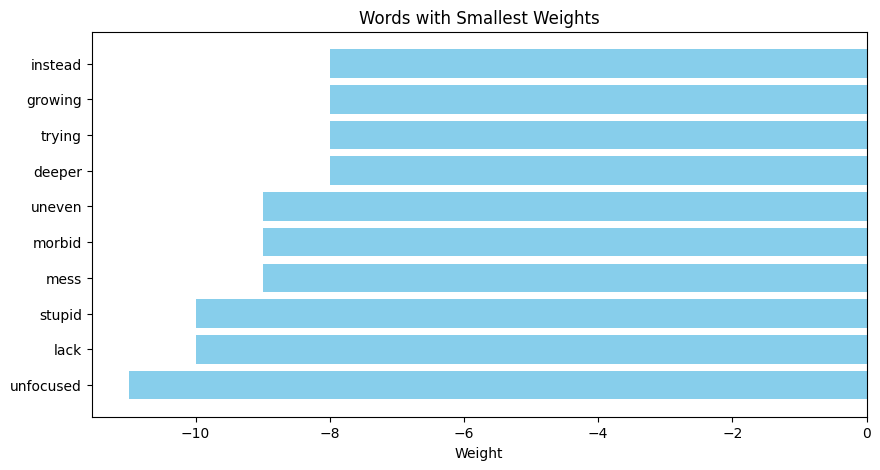

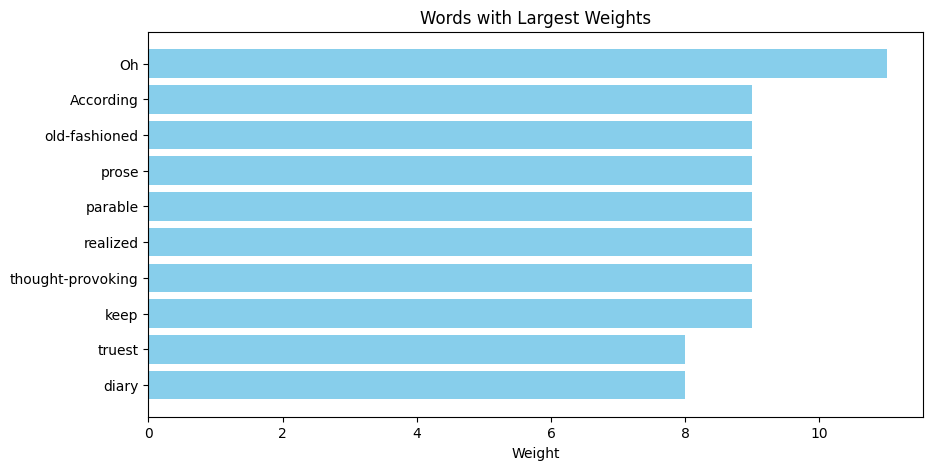

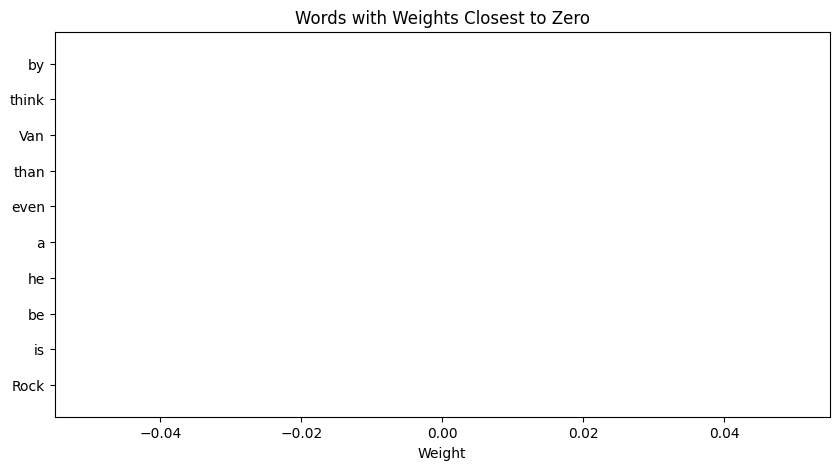

In [34]:
# Sort feature weights
sorted_weights = sorted(feature_weights.items(), key=lambda x: x[1])

# Extract words with the smallest, largest, and closest to zero weights
smallest_weights = sorted_weights[:10]
largest_weights = sorted_weights[-10:]
closest_to_zero = sorted(sorted_weights, key=lambda x: abs(x[1]))[:10]

# Plot the feature weights
def plot_feature_weights(weights, title):
    words, values = zip(*weights)
    plt.figure(figsize=(10, 5))
    plt.barh(words, values, color='skyblue')
    plt.xlabel('Weight')
    plt.title(title)
    plt.show()

plot_feature_weights(smallest_weights, "Words with Smallest Weights")
plot_feature_weights(largest_weights, "Words with Largest Weights")
plot_feature_weights(closest_to_zero, "Words with Weights Closest to Zero")

## Visualise the cases where model gets it wrong

Take some samples from dev and try to understand the errors

In [35]:
incorrect_dict = {-1: [], 0: [], 1: []}

In [36]:
for text, label in zip(data["dev"][0], data["dev"][1]):
    features = extract_features(text)
    predicted_label = run_classifier(features, feature_weights)
    if label != predicted_label:
        incorrect_dict[label].append((text, predicted_label))

In [37]:
for label in [-1, 0, 1]:
    print(f"5 sample error cases in label {label}")
    print('*' * 20)
    for text, predicted_label in incorrect_dict[label][:5]:
        print(f"{text:100s} ||| {predicted_label}")
    print("-" * 20)

5 sample error cases in label -1
********************
Here 's yet another studio horror franchise mucking up its storyline with glitches casual fans could correct in their sleep . ||| 1
If director Michael Dowse only superficially understands his characters , he does n't hold them in contempt . ||| 1
It 's somewhat clumsy and too lethargically paced -- but its story about a mysterious creature with psychic abilities offers a solid build-up , a terrific climax , and some nice chills along the way . ||| 1
Part low rent Godfather .                                                                            ||| 1
The script kicks in , and Mr. Hartley 's distended pace and foot-dragging rhythms follow .           ||| 1
--------------------
5 sample error cases in label 0
********************
No one goes unindicted here , which is probably for the best .                                       ||| 1
Half Submarine flick , Half Ghost Story , All in one criminally neglected film                  